In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("https://d8it4huxumps7.cloudfront.net/uploads/submissions_case/636dfd50f20b6_loan_dataset__1_.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     5000 non-null   int64  
 1   ID             5000 non-null   int64  
 2   Pin-code       5000 non-null   int64  
 3   age            5000 non-null   int64  
 4   Fam members    5000 non-null   float64
 5   Education      5000 non-null   object 
 6   T.Experience   5000 non-null   float64
 7   Income         5000 non-null   int64  
 8   Mortgage       5000 non-null   int64  
 9   Fixed Deposit  5000 non-null   object 
 10  Demat          5000 non-null   object 
 11  Net Banking    5000 non-null   object 
 12  Loan           5000 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 507.9+ KB


In [ ]:
df.describe()

,Unnamed: 0,ID,Pin-code,age,Fam members,T.Experience,Income,Mortgage
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03
mean,2499.500000,8.186318e+06,110006.557800,43.338400,2.396400,20.104600,5.901936e+05,4.519904e+05
std,1443.520003,3.638026e+06,4.998725,11.463166,1.147663,11.467954,3.682698e+05,8.137104e+05
min,0.000000,1.000100e+04,110001.000000,21.000000,1.000000,-3.000000,6.400000e+04,0.000000e+00
25%,1249.750000,1.000125e+07,110003.000000,33.000000,1.000000,10.000000,3.120000e+05,0.000000e+00
50%,2499.500000,1.000250e+07,110004.000000,43.000000,2.000000,20.000000,5.120000e+05,0.000000e+00
75%,3749.250000,1.000375e+07,110011.000000,53.000000,3.000000,30.000000,7.840000e+05,8.080000e+05
max,4999.000000,1.000500e+07,110014.000000,65.000000,4.000000,43.000000,1.792000e+06,5.080000e+06


In [ ]:
df.head()

,Unnamed: 0,ID,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
0,0,10001,110001,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,1,10002,110014,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no
2,2,10003,110014,37,1.0,Under Graduate,15.0,88000,0,no,no,no,no
3,3,10004,110003,33,1.0,Graduate,9.0,800000,0,no,no,no,no
4,4,10005,110004,33,4.0,Graduate,8.0,360000,0,no,no,no,no


In [ ]:
list(df.columns)

['Unnamed: 0',
 'ID',
 'Pin-code',
 'age',
 'Fam members',
 'Education',
 'T.Experience',
 'Income',
 'Mortgage',
 'Fixed Deposit',
 'Demat',
 'Net Banking',
 'Loan']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

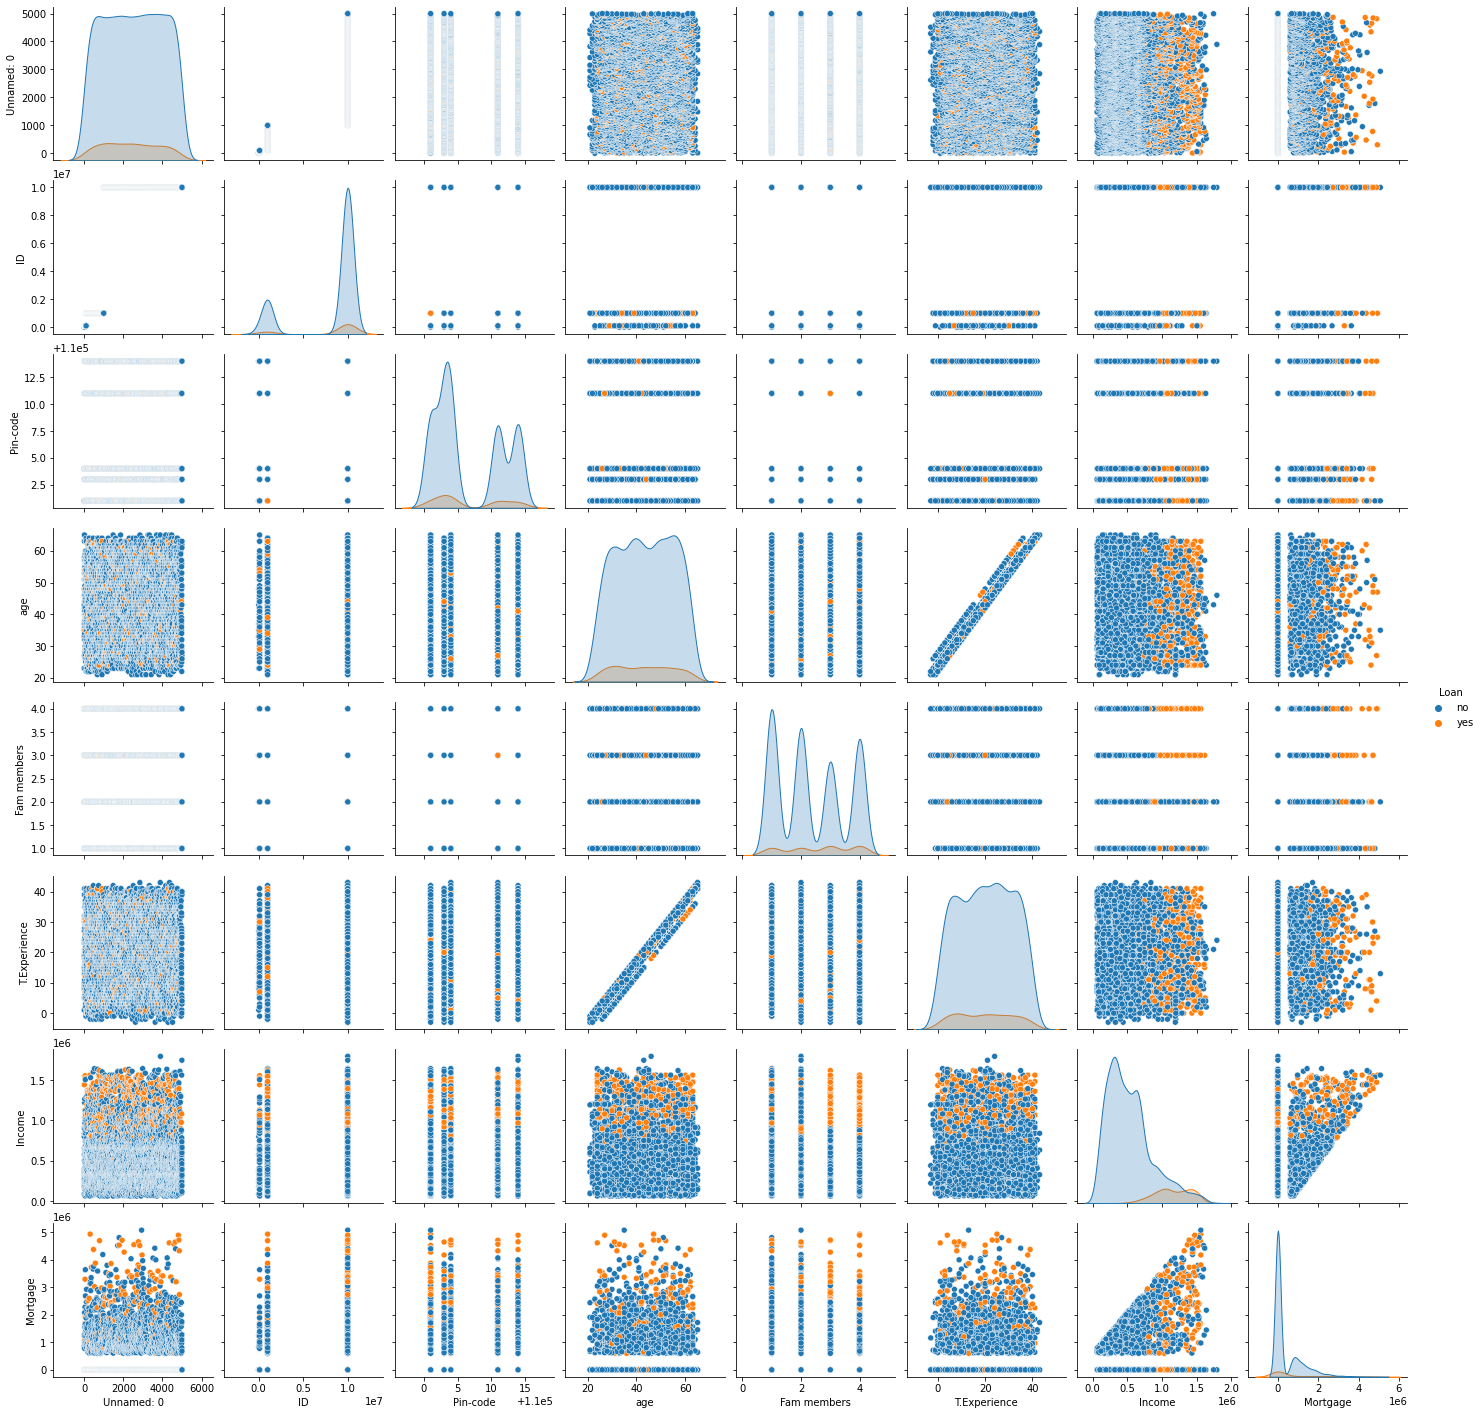

In [ ]:
sns.pairplot(df, hue ='Loan')
plt.show()

In [ ]:
df = pd.get_dummies(df, columns = ['Pin-code','Education'])

In [ ]:
df['Fixed Deposit'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
def convert(lis):
  for i in range(5000):
    if lis[i] == 'yes':
      lis[i] = 1
    else:
      lis[i] = 0
  lis=lis.astype(int)

In [ ]:
convert(df["Fixed Deposit"])
convert(df['Demat'])
convert(df['Net Banking'])
convert(df['Loan'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df["Fixed Deposit"] = df["Fixed Deposit"].astype(int)
df["Net Banking"] = df["Net Banking"].astype(int)
df["Demat"] = df["Demat"].astype(int)
df["Loan"] = df["Loan"].astype(int)

In [ ]:
df['Net Banking'].dtype

dtype('int64')

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score 
from sklearn.linear_model import LogisticRegression
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier(n_neighbors=5)
model3 = GaussianNB()
model4 = xg.XGBRegressor(objective ='reg:squarederror')

In [ ]:
# df["Education"].unique()

In [ ]:
# for i in range(5000):
#   if df["Education"][i] == 'Under Graduate':
#     df["Education"][i] = 0
#   elif df["Education"][i] == 'Graduate':
#     df["Education"][i] = 1
#   else:
#     df["Education"][i] = 2

In [ ]:
# df["Education"].unique()

In [ ]:
# df["Pin-code"].unique()

In [ ]:
# df["Education"] = df["Education"].astype(int)

In [ ]:
# for i in range(5000):
#   if df["Pin-code"][i] == 110001:
#     df["Pin-code"][i] = 0
#   elif df["Pin-code"][i] == 110014:
#     df["Pin-code"][i] = 1
#   elif df["Pin-code"][i] == 110003:
#     df["Pin-code"][i] = 2
#   elif df["Pin-code"][i] == 110004:
#     df["Pin-code"][i] = 3
#   else:
#     df["Pin-code"][i] = 4

In [ ]:
list(df.columns)

['Unnamed: 0',
 'ID',
 'age',
 'Fam members',
 'T.Experience',
 'Income',
 'Mortgage',
 'Fixed Deposit',
 'Demat',
 'Net Banking',
 'Loan',
 'Pin-code_110001',
 'Pin-code_110003',
 'Pin-code_110004',
 'Pin-code_110011',
 'Pin-code_110014',
 'Education_Graduate',
 'Education_Post Graduate',
 'Education_Under Graduate']

In [ ]:
X = df[['age','Fam members','T.Experience','Income','Mortgage','Fixed Deposit','Demat','Net Banking','Pin-code_110001','Pin-code_110003','Pin-code_110004','Pin-code_110011','Pin-code_110014','Education_Graduate','Education_Post Graduate','Education_Under Graduate']]
y = df["Loan"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror')

In [ ]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)

In [ ]:
rmse1 = np.sqrt(MSE(y_test, pred1))
rmse2 = np.sqrt(MSE(y_test, pred2))
rmse3 = np.sqrt(MSE(y_test, pred3))
rmse4 = np.sqrt(MSE(y_test, pred4))

In [ ]:
print(rmse1, rmse2, rmse3, rmse4)

0.30550504633038933 0.3200378765462651 0.31526804372460493 0.12340116214328027


In [ ]:
model4.feature_importances_

array([0.00367411, 0.24224879, 0.00531181, 0.11601015, 0.00551168,
       0.01736448, 0.00132314, 0.00182084, 0.00489255, 0.00072248,
       0.00822215, 0.00092256, 0.        , 0.00285357, 0.00425269,
       0.584869  ], dtype=float32)

In [ ]:
list(X.columns)

['age',
 'Fam members',
 'T.Experience',
 'Income',
 'Mortgage',
 'Fixed Deposit',
 'Demat',
 'Net Banking',
 'Pin-code_110001',
 'Pin-code_110003',
 'Pin-code_110004',
 'Pin-code_110011',
 'Pin-code_110014',
 'Education_Graduate',
 'Education_Post Graduate',
 'Education_Under Graduate']

In [ ]:
X.head()

,age,Fam members,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Pin-code_110001,Pin-code_110003,Pin-code_110004,Pin-code_110011,Pin-code_110014,Education_Graduate,Education_Post Graduate,Education_Under Graduate
0,23,4.0,1.0,392000,0,0,1,0,1,0,0,0,0,0,0,1
1,43,3.0,19.0,272000,0,0,1,0,0,0,0,0,1,0,0,1
2,37,1.0,15.0,88000,0,0,0,0,0,0,0,0,1,0,0,1
3,33,1.0,9.0,800000,0,0,0,0,0,1,0,0,0,1,0,0
4,33,4.0,8.0,360000,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
import matplotlib.pyplot as plt

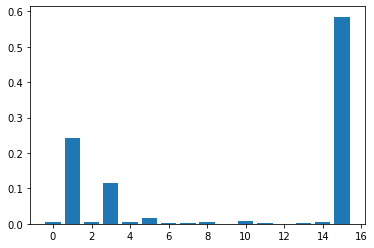

In [ ]:
plt.bar(range(len(model4.feature_importances_)), model4.feature_importances_)
plt.show()

In [ ]:
from xgboost import plot_importance

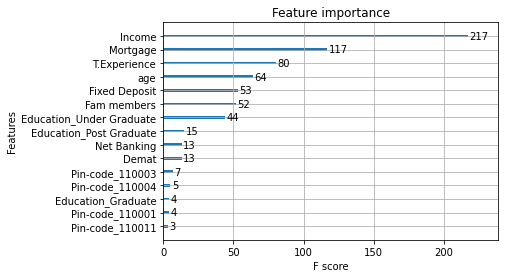

In [ ]:
plot_importance(model4)

In [ ]:
X.head()

,age,Fam members,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Pin-code_110001,Pin-code_110003,Pin-code_110004,Pin-code_110011,Pin-code_110014,Education_Graduate,Education_Post Graduate,Education_Under Graduate
0,23,4.0,1.0,392000,0,0,1,0,1,0,0,0,0,0,0,1
1,43,3.0,19.0,272000,0,0,1,0,0,0,0,0,1,0,0,1
2,37,1.0,15.0,88000,0,0,0,0,0,0,0,0,1,0,0,1
3,33,1.0,9.0,800000,0,0,0,0,0,1,0,0,0,1,0,0
4,33,4.0,8.0,360000,0,0,0,0,0,0,1,0,0,1,0,0
